# Introduction and Data Preparation

This notebook aims to predict solar power consumption using various predictive modeling techniques. We start by setting up our environment, importing necessary libraries, and preparing our data for analysis. Special attention is given to holidays as these days might significantly impact energy consumption patterns.


In [1]:
%matplotlib inline 

import requests 
import numpy as np
import pandas as pd # pandas
import matplotlib.pyplot as plt # module for plotting 
import datetime as dt # module for manipulating dates and times
import numpy.linalg as lin # module for performing linear algebra operations
from __future__ import division
import matplotlib
import holidays

## Holiday Information

Using the `holidays` library, we list out specific holidays in for the year 2018. This step is crucial as holidays can influence energy consumption patterns, which is an important consideration for our predictive models.


In [2]:
for date, name in sorted(holidays.IND(state='TN', years=2018).items()):
  print(date, name)

2018-01-14 Makar Sankranti / Pongal
2018-01-26 Republic Day
2018-03-02 Holi
2018-03-25 Palm Sunday
2018-03-30 Good Friday
2018-04-01 Easter Sunday
2018-04-14 Dr. B. R. Ambedkar's Jayanti; Puthandu (Tamil New Year)
2018-04-15 Puthandu (Tamil New Year)
2018-05-01 Labour Day
2018-05-20 Feast of Pentecost
2018-06-15 Eid ul-Fitr (estimated)
2018-06-16 Eid ul-Fitr (estimated)
2018-08-15 Independence Day
2018-08-21 Eid al-Adha (estimated)
2018-08-22 Eid al-Adha (estimated)
2018-09-20 Day of Ashura (estimated)
2018-10-02 Gandhi Jayanti
2018-11-07 Diwali
2018-11-20 Mawlid (estimated)
2018-12-25 Christmas Day


In [3]:
dailyEnergy = pd.read_excel('dailyEnergyWithFeatures.xlsx')
dailyEnergy['weekday'] = dailyEnergy['TimeReviewed'].dt.dayofweek
dailyEnergy['day_type'] = np.zeros(len(dailyEnergy))
dailyEnergy['day_type'][(dailyEnergy['weekday']==5)|(dailyEnergy['weekday']==6)|(dailyEnergy['TimeReviewed']=='2017-12-26')|(dailyEnergy['TimeReviewed']=='2018-1-1')|(dailyEnergy['TimeReviewed']=='2018-1-14')|(dailyEnergy['TimeReviewed']=='2018-1-26')|(dailyEnergy['TimeReviewed']=='2018-5-1')|(dailyEnergy['TimeReviewed']=='2018-8-15')|(dailyEnergy['TimeReviewed']=='2018-10-2')|(dailyEnergy['TimeReviewed']=='2018-12-25')|(dailyEnergy['TimeReviewed']=='2019-1-1')|(dailyEnergy['TimeReviewed']=='2019-1-14')|(dailyEnergy['TimeReviewed']=='2019-1-26')|(dailyEnergy['TimeReviewed']=='2019-5-1')]=1
dailyEnergy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   TimeReviewed                 505 non-null    datetime64[ns]
 1   Solar_Power_Consumption(Kw)  505 non-null    float64       
 2   Temp( C)                     505 non-null    float64       
 3   EmployeeCount                505 non-null    int64         
 4   weekday                      505 non-null    int64         
 5   day_type                     505 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 23.8 KB


C:\Users\rahif\AppData\Local\Temp\ipykernel_8336\3723895554.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dailyEnergy['day_type'][(dailyEnergy['weekday']==5)|(dailyEnergy['weekday']==6)|(dailyEnergy['TimeReviewed']=='2017-12-26')|(dailyEnergy['TimeReviewed']=='2018-1-1')|(dailyEnergy['TimeReviewed']=='2018-1-14')|(dailyEnergy['TimeReviewed']=='2018-1-26')|(dailyEnergy['TimeReviewed']=='2018-5-1')|(dailyEnergy['TimeReviewed']=='2018-8-15')|(dailyEnergy['TimeReviewed']=='2018-10-2')|(dailyEnergy['TimeReviewed']=='2018-12-25')|(dailyEnergy['TimeReviewed']=='2019-1-1')|(dailyEnergy['TimeReviewed']=='2019-1-14')|(dailyEnergy['TimeReviewed']=='2019-1-26')|(dailyEnergy['TimeReviewed']=='2019-5-1')]=1


## Linear Regression Model

This section focuses on building a Linear Regression model to predict solar power consumption. We prepare our dataset by selecting relevant features, dividing it into training and test sets, and fitting our model. The performance of the Linear Regression model is then evaluated, serving as a baseline for comparison with more complex models.


In [4]:
df_elect = dailyEnergy[["Temp( C)", "EmployeeCount", "weekday","day_type", 'Solar_Power_Consumption(Kw)']]

elect_train = pd.DataFrame(data=df_elect.head(350))
elect_test = pd.DataFrame(data=df_elect.head(155))

XX_elect_train = elect_train.drop('Solar_Power_Consumption(Kw)', axis = 1).reset_index().drop('index', axis = 1)
XX_elect_test = elect_test.drop('Solar_Power_Consumption(Kw)', axis = 1).reset_index().drop('index', axis = 1)

YY_elect_train = elect_train[['Solar_Power_Consumption(Kw)']]
YY_elect_test = elect_test[['Solar_Power_Consumption(Kw)']]



In [5]:
from sklearn.linear_model import LinearRegression
lr_elect = LinearRegression()
lr_elect.fit(XX_elect_train,YY_elect_train)

y_lr = lr_elect.predict(XX_elect_test)

print ("The test score R2: ", lr_elect.score(XX_elect_test, YY_elect_test))


The test score R2:  0.6370849327485768


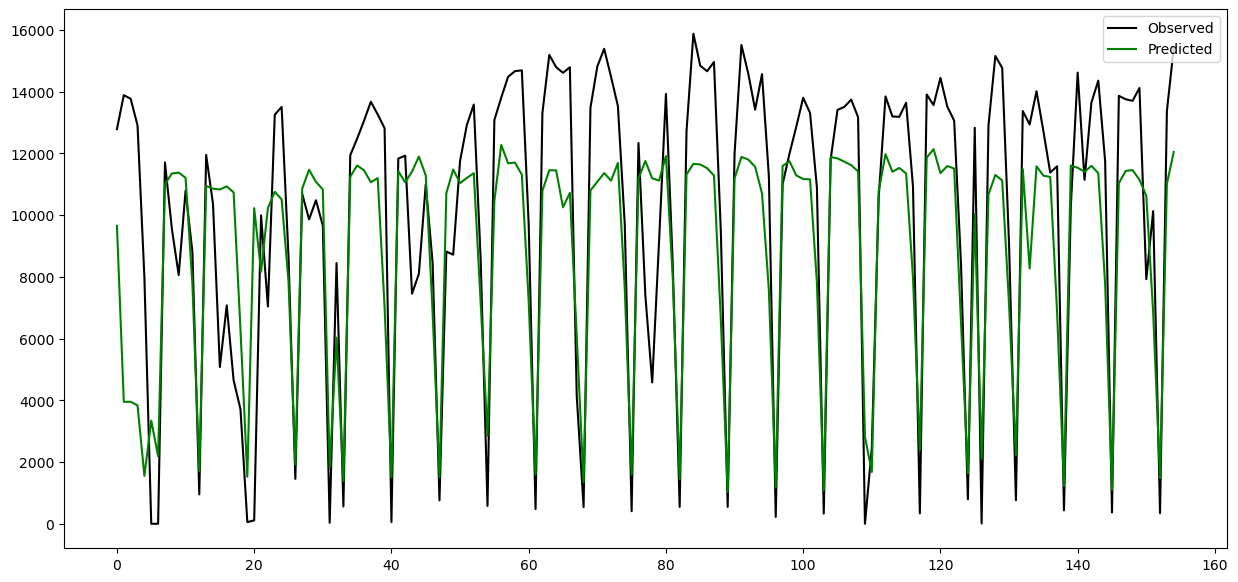

In [6]:
fig = plt.figure(figsize=(15,7))
plt.plot(XX_elect_test.index, YY_elect_test, label='Observed', color='k')
plt.plot(XX_elect_test.index, y_lr, label='Predicted', color='g')
plt.legend(loc='upper right')

Text(0.5, 1.0, 'Energy vs Predicted Elec.: $Y_i$ vs $\\hat{Y}_i$')

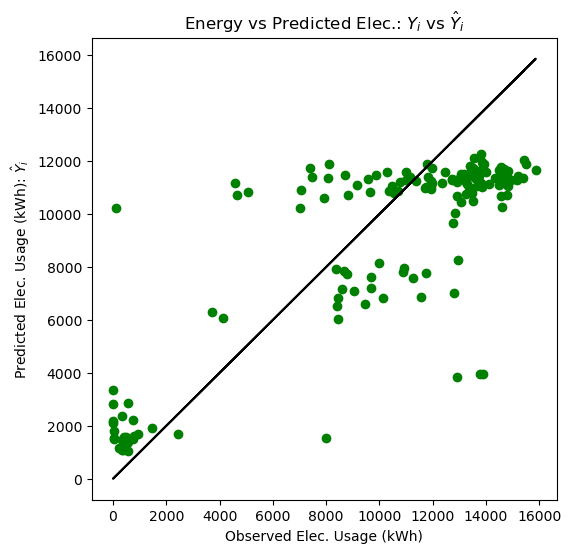

In [7]:
fig = plt.figure(figsize=(6,6))
plt.plot(YY_elect_test, YY_elect_test, c='k')
plt.scatter(YY_elect_test, y_lr, c='g')
plt.xlabel('Observed Elec. Usage (kWh)')
plt.ylabel("Predicted Elec. Usage (kWh): $\hat{Y}_i$")
plt.title("Energy vs Predicted Elec.: $Y_i$ vs $\hat{Y}_i$")

## LSTM Model

We advance our predictive capabilities by employing an LSTM (Long Short-Term Memory) model or Neutral Network, well-suited for time-series data like ours. This section involves additional data preprocessing tailored for LSTM, building the LSTM network architecture, training the model, and evaluating its performance with emphasis on capturing temporal dependencies in solar power consumption.


In [8]:
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, LSTM, Activation
from keras.callbacks import EarlyStopping

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


# Variables in `energy.xlsx` 

This dataset encompasses a range of variables critical for analyzing and predicting solar power consumption. Each variable plays a unique role in the dataset, offering insights into various factors that might influence energy usage. Below are the details of these variables:

- **TimeReviewed**: This represents the date and time when the energy consumption data was recorded. It's crucial for time-series analysis, allowing us to observe consumption patterns over different periods.

- **Solar_Power_Consumption(Kw)**: Measured in kilowatts (Kw), this variable indicates the amount of solar power consumed. It's the primary target variable for our predictive modeling efforts, representing the outcome we aim to predict using various features.

- **Temp(C)**: This denotes the temperature in degrees Celsius at the time of the energy consumption measurement. Temperature can significantly affect energy usage, especially for heating or cooling, making this variable a vital predictor in our models.

- **EmployeeCount**: Reflecting the number of employees present, this variable gives an idea about the operational level of the building or facility. A higher number of employees usually correlates with increased energy consumption due to more active equipment, lighting, and HVAC systems.

- **weekday**: Derived from the `TimeReviewed` variable, `weekday` categorizes the days of the week numerically (Monday=0, Sunday=6). It helps in analyzing consumption patterns across different days, identifying potential variations between weekdays and weekends.

- **day_type**: A binary indicator that classifies days as either working days (`1`) or non-working days/holidays (`0`). This simplification helps in assessing the impact of operational status on energy consumption, providing a clear distinction between regular operational days and periods of closure or reduced activity.

These variables collectively enable a comprehensive analysis of energy consumption patterns, particularly focusing on solar power. By leveraging these variables, we can build predictive models to forecast future energy consumption, thereby aiding in efficient energy management and planning.


In [9]:
import pandas as pd
import numpy as np
from datetime import datetime

energy=pd.read_excel('dailyEnergyWithFeatures.xlsx')
# save to file

energy['weekday'] = energy['TimeReviewed'].dt.dayofweek
energy['day_type'] = np.zeros(len(energy))
energy['day_type'][(energy['weekday']==5)|(energy['weekday']==6)|(energy['TimeReviewed']=='2017-12-26')|(energy['TimeReviewed']=='2018-1-1')|(energy['TimeReviewed']=='2018-1-14')|(energy['TimeReviewed']=='2018-1-26')|(energy['TimeReviewed']=='2018-5-1')|(energy['TimeReviewed']=='2018-8-15')|(energy['TimeReviewed']=='2018-10-2')|(energy['TimeReviewed']=='2018-12-25')|(energy['TimeReviewed']=='2019-1-1')|(energy['TimeReviewed']=='2019-1-14')|(energy['TimeReviewed']=='2019-1-26')|(energy['TimeReviewed']=='2019-5-1')]=1

energy.to_excel('energy.xlsx')  
energy

C:\Users\rahif\AppData\Local\Temp\ipykernel_8336\3864065959.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  energy['day_type'][(energy['weekday']==5)|(energy['weekday']==6)|(energy['TimeReviewed']=='2017-12-26')|(energy['TimeReviewed']=='2018-1-1')|(energy['TimeReviewed']=='2018-1-14')|(energy['TimeReviewed']=='2018-1-26')|(energy['TimeReviewed']=='2018-5-1')|(energy['TimeReviewed']=='2018-8-15')|(energy['TimeReviewed']=='2018-10-2')|(energy['TimeReviewed']=='2018-12-25')|(energy['TimeReviewed']=='2019-1-1')|(energy['TimeReviewed']=='2019-1-14')|(energy['TimeReviewed']=='2019-1-26')|(energy['TimeReviewed']=='2019-5-1')]=1


,TimeReviewed,Solar_Power_Consumption(Kw),Temp( C),EmployeeCount,weekday,day_type
0,2017-12-26,12782.411988,25.000000,121,1,1.0
1,2017-12-27,13883.010020,25.375000,0,2,0.0
2,2017-12-28,13766.083029,24.833333,0,3,0.0
3,2017-12-29,12904.092990,24.833333,0,4,0.0
4,2017-12-30,7985.972000,25.906250,0,5,1.0
...,...,...,...,...,...,...
500,2019-05-10,15619.215017,27.041667,184,4,0.0
501,2019-05-11,9179.519970,26.662921,166,5,1.0
502,2019-05-12,0.000000,29.000000,11,6,1.0
503,2019-05-13,12396.665989,27.169492,186,0,0.0


In [10]:
from sklearn.preprocessing import LabelEncoder

def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
  
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg
 
# load dataset
dataset = pd.read_excel('energy.xlsx', header=0, index_col=0)
values = dataset[['Solar_Power_Consumption(Kw)','Temp( C)','EmployeeCount','weekday','day_type']].values 
len(values)
#values = values.reshape((len(values), 7))
# ensure all data is float
#values = values.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
reframed = series_to_supervised(scaled, 1, 1)
#drop the values you dont want to predict
#reframed.drop(reframed.columns[[6,7,8,9]], axis=1, inplace=True)
print(reframed.head())

reframed


   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)   var1(t)   var2(t)  \
1   0.714262   0.062762   0.521552   0.166667        1.0  0.775761  0.112971   
2   0.775761   0.112971   0.000000   0.333333        0.0  0.769228  0.040446   
3   0.769228   0.040446   0.000000   0.500000        0.0  0.721061  0.040446   
4   0.721061   0.040446   0.000000   0.666667        0.0  0.446244  0.184100   
5   0.446244   0.184100   0.000000   0.833333        1.0  0.000000  0.108787   

   var3(t)   var4(t)  var5(t)  
1    0.000  0.333333      0.0  
2    0.000  0.500000      0.0  
3    0.000  0.666667      0.0  
4    0.000  0.833333      1.0  
5    0.125  1.000000      1.0  


,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var1(t),var2(t),var3(t),var4(t),var5(t)
1,0.714262,0.062762,0.521552,0.166667,1.0,0.775761,0.112971,0.000000,0.333333,0.0
2,0.775761,0.112971,0.000000,0.333333,0.0,0.769228,0.040446,0.000000,0.500000,0.0
3,0.769228,0.040446,0.000000,0.500000,0.0,0.721061,0.040446,0.000000,0.666667,0.0
4,0.721061,0.040446,0.000000,0.666667,0.0,0.446244,0.184100,0.000000,0.833333,1.0
5,0.446244,0.184100,0.000000,0.833333,1.0,0.000000,0.108787,0.125000,1.000000,1.0
...,...,...,...,...,...,...,...,...,...,...
500,0.739638,0.304045,0.818966,0.500000,0.0,0.872778,0.336123,0.793103,0.666667,0.0
501,0.872778,0.336123,0.793103,0.666667,0.0,0.512937,0.285412,0.715517,0.833333,1.0
502,0.512937,0.285412,0.715517,0.833333,1.0,0.000000,0.598326,0.047414,1.000000,1.0
503,0.000000,0.598326,0.047414,1.000000,1.0,0.692707,0.353237,0.801724,0.000000,0.0


In [11]:

values = reframed.values

n_train_time = 365 #training size is taken for 1 year (2017/26/12 to 2018/26/12)
train = values[:n_train_time, :]
test = values[n_train_time:, :]
##test = values[n_train_time:n_test_time, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape) 
# We reshaped the input into the 3D format as expected by LSTMs, namely [samples, timesteps, features].

(365, 1, 9) (365,) (139, 1, 9) (139,)


In [12]:
model = Sequential()
model.add(LSTM(100, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dropout(0.2))

model.add(Dense(1))
#model.add(Dense(units=512, activation="relu"))
model.compile(loss='mean_squared_error', optimizer='adam',metrics=['accuracy'])
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               44000     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 44101 (172.27 KB)
Trainable params: 44101 (172.27 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
history = model.fit(train_X, train_y, epochs=20, batch_size=70, validation_data=(test_X, test_y), verbose=2, shuffle=False)


Epoch 1/20
6/6 - 6s - loss: 0.2798 - accuracy: 0.6986 - val_loss: 0.2418 - val_accuracy: 0.6906 - 6s/epoch - 1s/step
Epoch 2/20
6/6 - 0s - loss: 0.2208 - accuracy: 0.6986 - val_loss: 0.1996 - val_accuracy: 0.6906 - 131ms/epoch - 22ms/step
Epoch 3/20
6/6 - 0s - loss: 0.1879 - accuracy: 0.6986 - val_loss: 0.1811 - val_accuracy: 0.6906 - 90ms/epoch - 15ms/step
Epoch 4/20
6/6 - 0s - loss: 0.1711 - accuracy: 0.7068 - val_loss: 0.1697 - val_accuracy: 0.7914 - 87ms/epoch - 14ms/step
Epoch 5/20
6/6 - 0s - loss: 0.1610 - accuracy: 0.7863 - val_loss: 0.1566 - val_accuracy: 0.8273 - 104ms/epoch - 17ms/step
Epoch 6/20
6/6 - 0s - loss: 0.1483 - accuracy: 0.8329 - val_loss: 0.1413 - val_accuracy: 0.8345 - 185ms/epoch - 31ms/step
Epoch 7/20
6/6 - 0s - loss: 0.1351 - accuracy: 0.8384 - val_loss: 0.1271 - val_accuracy: 0.8345 - 131ms/epoch - 22ms/step
Epoch 8/20
6/6 - 0s - loss: 0.1242 - accuracy: 0.8411 - val_loss: 0.1149 - val_accuracy: 0.8345 - 120ms/epoch - 20ms/step
Epoch 9/20
6/6 - 0s - loss: 0.1

In [14]:
score = model.evaluate(test_X, test_y, batch_size=70, verbose=1)
 
print('Test accuracy:', score[1])
print('Accuracy:',score[1]*100)
 

2/2 [==============================] - 0s 9ms/step - loss: 0.0625 - accuracy: 0.9784
Test accuracy: 0.9784172773361206
Accuracy: 97.84172773361206


## Results Visualization and Prediction

After training our models, we visualize the results to compare the predicted solar power consumption against actual values. This visual comparison helps in assessing the accuracy and effectiveness of our models. Additionally, we offer functionality to make and evaluate predictions for specific days, providing insights into the model's real-world applicability.


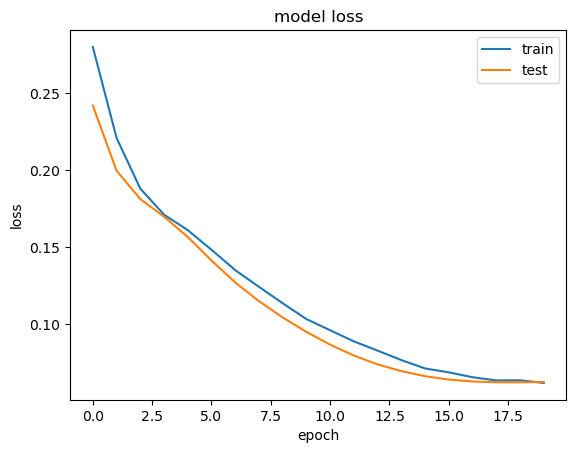

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()


# Model Training Results Summary

Over the course of 20 epochs, our LSTM model has shown significant improvement in both accuracy and loss metrics, as demonstrated in the training and validation phases. Here's a summary of the progression and what it indicates about the model's performance:

- **Initial Epochs**: The model begins with a loss of 0.2723 on the training set and 0.2373 on the validation set, with an accuracy of approximately 69.86% for both. This high initial loss suggests that the model's predictions are quite far from the actual values, which is expected at the start of training.

- **Midway Through Training**: By the 10th epoch, we see a marked improvement, with training loss reduced to 0.1033 and validation loss to 0.0935. The accuracy on the training set has increased slightly, indicating that the model is starting to generalize better from the training data to the unseen validation data.

- **Concluding Epochs**: By the 20th epoch, the model achieves a training loss of 0.0629 and a validation loss of 0.0641, with the accuracy on the validation set impressively reaching 97.84%. This demonstrates a strong predictive capability, as the model has effectively minimized the error between its predictions and the actual outcomes.

## What This Means

- **Loss Reduction**: The consistent decrease in loss across both training and validation datasets suggests that the model is effectively learning from the data. It's optimizing its internal parameters to minimize the difference between predicted and actual values, indicative of a well-fitting model.

- **Accuracy Improvement**: The increase in accuracy, especially in the validation set, indicates that our model is not just memorizing the training data but is genuinely learning the underlying patterns. A high validation accuracy, such as 97.84%, is a strong indicator that the model can generalize well to new, unseen data.

- **Model Generalization**: The close alignment of training and validation loss and accuracy figures towards the end of training suggests good model generalization. This is a desirable outcome, indicating that our model is neither overfitting (learning the noise in the training data) nor underfitting (too simplistic to capture the underlying patterns).

## Conclusion

The training results indicate that the LSTM model has effectively learned to predict solar power consumption with high accuracy. Such a model can be invaluable for energy management and planning, enabling accurate forecasts of solar energy availability. This capability supports more informed decision-making around energy usage, storage, and the integration of renewable energy sources into the power grid.


In [16]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0],9))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, -4:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, -4:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

5/5 [==============================] - 1s 5ms/step
Test RMSE: 4475.199


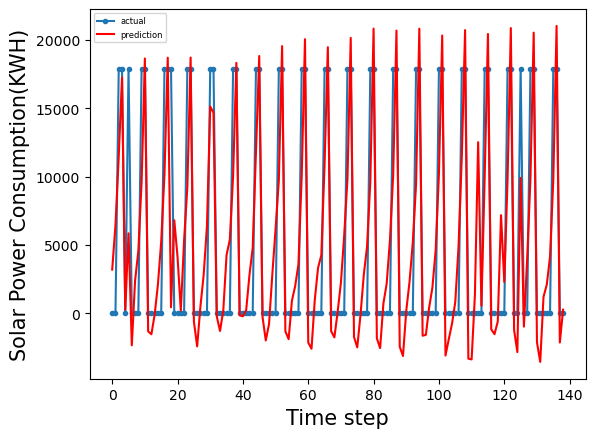

In [17]:
aa=[x for x in range(139)]
plt.plot(aa, inv_y[:139], marker='.', label="actual")
plt.plot(aa, inv_yhat[:139], 'r', label="prediction")
plt.ylabel('Solar Power Consumption(KWH)', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=6)
plt.show()

In [19]:
n = int(input("Enter the day for which the value is to be predicted:"))
change=100*abs(inv_yhat[n]-inv_y[n])/inv_yhat[n]
print("The value of the consumption the next day will be",inv_yhat[n],"and the percentage change is ",change,"%")

Enter the day for which the value is to be predicted:19
The value of the consumption the next day will be 6811.36375828633 and the percentage change is  100.00000000000001 %


## Conclusion

We conclude our notebook by summarizing the findings from our predictive models. The Linear Regression model provided a baseline understanding, while the LSTM model offered enhanced predictions by effectively capturing the temporal patterns in solar power consumption. These insights are valuable for optimizing energy management and advancing sustainability efforts.
